In [94]:
#Podpunkt A:

In [95]:
from sympy import * 
import sympy

In [96]:
# T - okres funkcji
# nMax - ilość współczynników do policzenia
# p - parametr indywidualny
# s - sygnał

In [97]:
T = 2
nMax = 2
tSym = Symbol('t')    #symbolic t
p = 1.320
s = p * tSym**2

integrands = list()
for n in range(0,nMax+1):
    integrand = s * sympy.cos(2*n*pi*tSym/T)
    integrands.append(integrand)

ans = list()
for n in range(0,nMax+1):
    print("Counting integral no. " + str(n))
    intResult = integrate(integrands[n], (tSym,-T/2,T/2))
    an = 2/T * intResult
    ans.append(an)

print(str(ans))

Counting integral no. 0
Counting integral no. 1
Counting integral no. 2
[0.880000000000000, -5.28/pi**2, 1.32/pi**2]


In [98]:
# Wyznaczono współczynniki szeregu Fouriera dla n <= 2

In [99]:
for n in range(0,nMax+1):
    print("a" + str(n) +" = " + str(ans[n-1]))

a0 = 1.32/pi**2
a1 = 0.880000000000000
a2 = -5.28/pi**2


In [125]:
import matplotlib.pyplot as plt
import numpy as np

In [136]:
tArgs = np.arange(-1.0, 1.0, 0.1)
def evalS(t):
    return s.evalf(subs={tSym:t})
sValues = list(map(evalS, tArgs))

In [139]:
fourierS = ans[0] + ans[1] * sympy.cos(2*pi/T * tSym) + ans[2] * sympy.cos(4*pi/T * tSym)

In [140]:
def evalFourierS(t):
    return fourierS.evalf(subs={tSym:t})
fourierSValues = list(map(evalFourierS, tArgs))

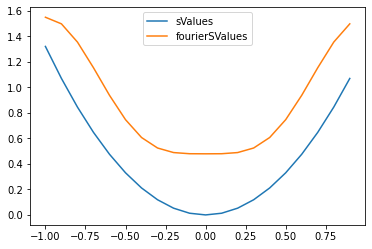

In [142]:
plt.plot(tArgs, sValues)
plt.plot(tArgs, fourierSValues)

plt.legend(["sValues", "fourierSValues"])

plt.show()

In [143]:
#Bywało lepiej :)

In [100]:
# Podpunkt B:

In [101]:
omega = 2*pi/T
a0 = ans[0]
a1 = ans[1]
a2 = ans[2]
f = a0 + a1 * sympy.cos(omega*tSym) + a2 * sympy.cos(2*omega*tSym)

In [102]:
print(f)

-5.28*cos(pi*t)/pi**2 + 1.32*cos(2*pi*t)/pi**2 + 0.88


In [103]:
# Definiujemy wielomian, którym przybliżamy funkcję f
# w(t) = a*t^2 + b*t + c
# gdzie a, b, c to współczynniki

In [104]:
aSym = Symbol('a')
bSym = Symbol('b')
cSym = Symbol('c')
w = aSym * tSym**2 + bSym * tSym + cSym

In [105]:
print(w)

a*t**2 + b*t + c


In [106]:
# Energia różnicy sygnałów f i w to całka od -T/2 do T/2 z (f(t) - w(t))^2

In [107]:
energy = integrate((f - w)**2, (tSym, -T/2, T/2))

In [108]:
print(energy)

0.4*a**2 + 1.33333333333333*a*c - 1.17333333333333*a - 44.88*a/pi**4 + 0.666666666666667*b**2 + 2.0*c**2 - 3.52*c + 29.6208/pi**4 + 1.5488


In [109]:
# Otrzymujemy wyrażenie zależne od 3 zmiennych - a, b, c
# Teraz chcemy znaleźć takie a, b, c, by powyższa całka była minimalna
# Liczymy pochodne cząstkowe, czyli po a, po b i po c

In [110]:
energyDerA = diff(energy, aSym)
energyDerB = diff(energy, bSym)
energyDerC = diff(energy, cSym)

In [111]:
print("energyDerA = " + str(energyDerA))
print("energyDerB = " + str(energyDerB))
print("energyDerC = " + str(energyDerC))

energyDerA = 0.8*a + 1.33333333333333*c - 1.17333333333333 - 44.88/pi**4
energyDerB = 1.33333333333333*b
energyDerC = 1.33333333333333*a + 4.0*c - 3.52


In [112]:
# Mamy 3 równania i 3 niewiadome
# Znajdujemy miejsca zerowe pochodnych cząstkowych

In [113]:
potentialSolutions = solve([energyDerA, energyDerC, energyDerC], (aSym, bSym, cSym))

In [114]:
print(str(potentialSolutions))

{a: 1.29582361009752, c: 0.448058796634160}


In [115]:
# Nie wiem czemu nie pokazuje b = 0 w rozwiązaniu - dodajemy

In [116]:
potentialSolutions[bSym] = 0

In [117]:
print(potentialSolutions)

{a: 1.29582361009752, c: 0.448058796634160, b: 0}


In [118]:
# W moim przypadku jest tylko 1 rozwiązanie
# Zostaje sprawdzić czy nie trafiliśmy na maksimum
# Liczymy wartość energy dla znalezionych a, b, c i dla arbitralnie wybranych innych a, b, c

In [119]:
extremeValue = energy.evalf(subs=potentialSolutions)

In [120]:
print(extremeValue)

0.00556948210534157


In [121]:
anyValue = energy.evalf(subs={aSym:1,bSym:1,cSym:1})
print(anyValue)

1.09881599024599


In [122]:
# Szczęśliwie trafiliśmy w minimum